In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_mean_reverting(S0, theta, mu, sigma, T, dt, N_paths):
    """
    Simulates a Mean-Reverting (Ornstein-Uhlenbeck) process.
    :param S0: Initial asset price
    :param theta: Speed of reversion
    :param mu: Long-term mean level
    :param sigma: Volatility
    :param T: Time horizon (in years)
    :param dt: Time step
    :param N_paths: Number of simulation paths
    :return: Simulated asset price paths
    """
    N_steps = int(T / dt)
    t = np.linspace(0, T, N_steps)
    S = np.zeros((N_steps, N_paths))
    S[0] = S0
    
    for i in range(1, N_steps):
        dW = np.random.normal(0, np.sqrt(dt), size=N_paths)
        S[i] = S[i-1] + theta * (mu - S[i-1]) * dt + sigma * dW
    
    return t, S

In [3]:
# Parameters
S0 = 100  # Initial price
theta = 0.5  # Mean reversion speed
mu = 100  # Long-term mean level
sigma = 5  # Volatility
T = 1  # 1 year
dt = 1/252  # Daily steps
N_paths = 10  # Number of simulations

In [4]:
# Run simulation
t, S = simulate_mean_reverting(S0, theta, mu, sigma, T, dt, N_paths)

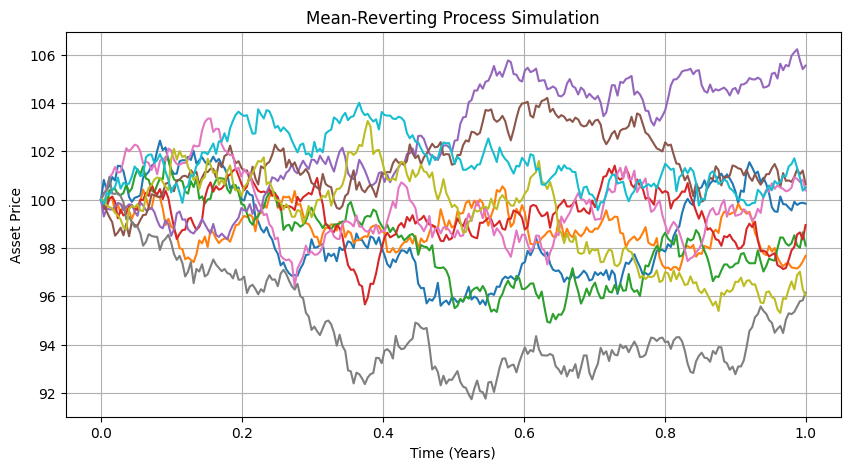

In [5]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, S)
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.title('Mean-Reverting Process Simulation')
plt.grid()
plt.show()

In [6]:
def estimate_mean_reverting_parameters(price_series, dt):
    X_t = price_series[:-1]
    X_t1 = price_series[1:]
    beta = np.polyfit(X_t, X_t1, 1)[0]
    kappa_hat = -np.log(beta) / dt
    mu_hat = np.mean(price_series)
    sigma_hat = np.std(X_t1 - X_t)
    return kappa_hat, mu_hat, sigma_hat
